In [1]:
import pandas as pd

import nltk
import string

tokens_blocked = (
    set(nltk.corpus.stopwords.words('english'))
        | set(string.punctuation)
)

tokens = nltk.corpus.genesis.words('english-kjv.txt')

df_tokens = pd.Series(filter(lambda x: x not in tokens_blocked, tokens))
df_token_freqs = df_tokens.value_counts()

df_token_freqs_ = pd.DataFrame({
    'token': df_token_freqs.index,
    'frequency': df_token_freqs.values
})
df_token_freqs_

,token,frequency
0,And,1250
1,unto,590
2,I,484
3,said,476
4,thou,272
...,...,...
2656,half,1
2657,golden,1
2658,wit,1
2659,wondering,1


In [2]:
import matplotlib.pyplot as plt

from tagcloud import (
    TagCloud,
    DescendingFrequencyTable,
    FrequencyData,
    graphics
)
from tagcloud.backends.backend_pil import CanvasPIL

In [3]:
wc = TagCloud(canvas_backend=CanvasPIL)

In [6]:
%%capture

# TODO normalize

c = wc.draw(
    frequency_table=DescendingFrequencyTable.from_dataframe(df_token_freqs_).head(200),
    text_props=dict(
        #size_max=200,
        #rotation_range=(0, 0),
        #rotation_step=90,
        rotation_prob=.1
    ),
    canvas_props=dict(size=graphics.Dimension(200, 400))
)
_ = plt.imshow(c.data_bilevel)

In [2]:
#%%capture

#!pip install --force-reinstall wordcloud

import wordcloud

im = wordcloud.WordCloud(background_color=None, mode='RGBA', prefer_horizontal=1.).generate(nltk.corpus.genesis.open('english-kjv.txt').read()).to_image()

progress unto 1.0
try init 200 None
elapsed 0:00:00.013572
progress son 0.7758620689655172
try init 147 None
elapsed 0:00:00.026232
layout len 2
progress unto 1.0
try init 103 None
elapsed 0:00:00.000375
progress son 0.7758620689655172
try init 91 None
elapsed 0:00:00.000394
progress said 0.6666666666666666
try init 85 None
elapsed 0:00:00.000407
progress land 0.5287356321839081
try init 76 None
elapsed 0:00:00.011755
progress thee 0.514367816091954
try init 45 None
elapsed 0:00:00.000445
progress Jacob 0.514367816091954
try init 45 None
elapsed 0:00:00.001213
progress said unto 0.514367816091954
try init 43 None
elapsed 0:00:00.005084
progress thy 0.5086206896551724
try init 31 None
elapsed 0:00:00.000479
progress father 0.4885057471264368
try init 30 None
elapsed 0:00:00.000938
progress came 0.4827586206896552
try init 29 None
elapsed 0:00:00.000487
progress LORD 0.45977011494252873
try init 28 None
elapsed 0:00:00.001196
progress Joseph 0.4511494252873563
try init 28 None
elapsed 0:

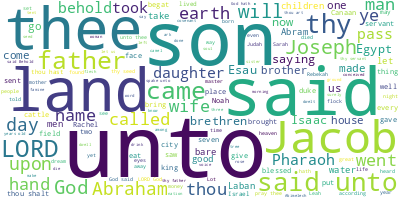

In [11]:
im

In [ ]:
wordcloud.__file__

'/tmp/env-tagcloud-dev/lib/python3.10/site-packages/wordcloud/__init__.py'

: 

: 

: 

: 